# Plot the most frequent words used in rap, rock, and country music
[*John W. Miller*](www.johnwmillr.com)

September, 2018

---

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

FS = 16 # fontsize
%matplotlib inline
plt.style.use('seaborn')

## Load the song lyrics data

In [2]:
songs = pd.read_json('./lyrics/all_songs.json')
genres = songs.genre.unique()
print(genres)

['rap' 'rock' 'country']


In [3]:
artist = songs[songs.artist=='The Beatles']
artist.head(3)

,album,artist,gender,genre,image,lyrics,raw,title,year
34290,Let It Be,The Beatles,male,rock,https://images.genius.com/1f61e7c20f3ec7d82362...,Words are flowing out like endless rain into a...,"{'annotation_count': 13, 'api_path': '/songs/1...",Across the Universe,1969-12-12
34291,Help!,The Beatles,male,rock,https://images.genius.com/adbf27acc77a06acfa4a...,They're gonna put me in the movies\nThey're go...,"{'annotation_count': 5, 'api_path': '/songs/12...",Act Naturally,1965-08-06
34292,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,male,rock,https://images.genius.com/0e36e5abf5d93b95a6d8...,"I read the news today, oh boy\nAbout a lucky m...","{'annotation_count': 17, 'api_path': '/songs/1...",A Day in the Life,1967-06-01


## Write a text tokenizer

In [4]:
# We'll use these helper functions throughout the analysis
import nltk
from nltk.corpus import stopwords
from string import punctuation
punctuation = "".join([symbol for symbol in punctuation if symbol not in ["'", '"']])
punctuation += '–'

def clean_str(s):
    return s.translate(str.maketrans('', '', punctuation)).replace('\u200b', " ").strip().lower()

def tokenizeText(txt, remove_stop_words=True):
    """Splits a string of text into individual words"""
    stop_words = set(stopwords.words('english')) if remove_stop_words else []
    words = [w for w in clean_str(txt).split() if w not in stop_words]
    words = ['N-Word' if w in ['nigga', 'niggas'] else w for w in words]
    return words

## Work with a subset of lyrics

In [5]:
import random

In [6]:
# Create a subset of country and rap songs
n = 500
tmp = []
for genre in genres:
    tmp.append(songs[songs.genre==genre].sample(n))
subset = pd.concat(tmp)

In [299]:
# Use the full dataset
subset = songs

## Calculate the word frequency distributions

In [300]:
freq_dists, total_words = [], []
for genre in genres:    
    # Tokenize the song lyrics
    token_lists = list(map(tokenizeText, subset[subset.genre==genre].lyrics))
    tokens = [word for song in token_lists for word in song]
    
    # Calculate word frequencies
    freq_dists.append(nltk.FreqDist(tokens))
    
    # Calculate total number of words
    all_words = []
    for lyrics in subset[subset.genre==genre].lyrics:
        all_words.extend(lyrics.split(' '))
    total_words.append(len(all_words))

In [301]:
freq_dists[0]

FreqDist({"i'm": 125229, 'like': 108237, 'N-Word': 104700, 'get': 76544, 'got': 74075, 'know': 60989, "ain't": 49758, 'shit': 45393, 'yeah': 35189, 'fuck': 34367, ...})

## Visualize the word frequencies

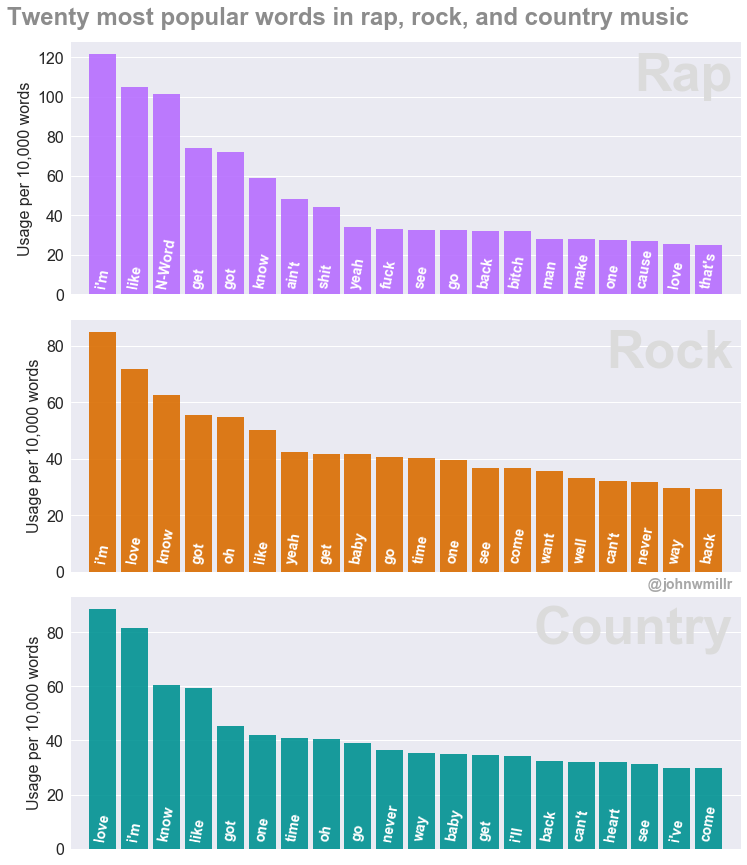

In [310]:
num_words = 20
fig, axs = plt.subplots(nrows=len(freq_dists), figsize=(12, 14), sharex=True)
for ax, fd, total, g, c in zip(axs, freq_dists, total_words, genres, colors):
    # Extract word counts for the current genre
    words, counts = zip(*[(word,count) for word, count in fd.most_common(num_words)])
    idxs = np.arange(num_words)
    
    # Normalize to 'Usage per 10,000 words'
    counts = 10000*(np.asarray(counts)/total)
    
    # Make the graph
    ax.bar(idxs, counts, width=0.85, color=c, alpha=0.9)
    ax.set_ylabel('Usage per 10,000 words', fontsize=FS)
    ax.set_xticks([])
    ax.grid(True)
    
    # Add the song words to the plot
    params = {'fontsize': FS-2, 'rotation':80, 'va':'bottom', 'ha':'center',
              'color':'white', 'alpha':1, 'weight':'heavy', 'zorder':50}
    for idx, word in zip(idxs, words):
        ax.text(idx, 2.6, word, fontdict=params)
    
    # Plot title
    y = ax.get_ylim()[1]
    x = idxs[-1]*1.04    
    xlim = ax.get_xlim()
    mid = np.mean(xlim)
    params = {'fontsize': FS+36, 'weight': 'heavy', 'ha': 'right', 'va':'bottom',
              'alpha': 1, 'color':np.array([219, 219, 219])/255, 'zorder':500}    
    ax.text(x, y*0.77, '{genre}'.format(genre=g[0].upper()+g[1:]), fontdict=params)
    
    if ax == axs[0]:
        ax.text(-3, y*1.07,
                "Twenty most popular words in rap, rock, and country music",
                fontsize=FS+8, ha='left', color='gray', weight='heavy', alpha=0.9)
    if ax == axs[-1]:
        ax.text(x*0.865, y*1.05, "@", fontsize=FS-2, alpha=0.4, ha='left', va='center', weight='heavy')
        ax.text(x, y*1.05, "johnwmillr", fontsize=FS-2, alpha=0.4, ha='right', va='center', weight='heavy')        
    
        
    ax.tick_params(labelsize=FS, direction='out')
    ax.set_xlim([-1, num_words])

plt.subplots_adjust(bottom=0.1, right=0.9, top=0.9, hspace=0.1)
# plt.show()

plt.savefig('./figures/most_common_words.png', dpi=300, bbox_inches='tight')